**Universidade Federal do Pará**

**Mestrado em Computação Aplicada PPCA/Tucuruí**

**Disciplina: Inteligência Artificial**

Laciene Alves Melo

---

> Objetivo: Aplicar modelos para prever se o crédito do cliente deve ou não ser aprovado

In [178]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
# matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
# RNA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [179]:
# carregando a base de dados
dataset = pd.read_csv('../dataset/normalized.csv')
dataset

,score,state,gender,age,patrimony,balance,products,credit_card,active,approved_credit
0,619,RS,F,42,2,0,1,1,1,1
1,608,SC,F,41,1,8380786,1,0,1,0
2,502,RS,F,42,8,1596608,3,1,0,1
3,699,RS,F,39,1,0,2,0,0,0
4,850,SC,F,43,2,12551082,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
994,838,SC,M,43,9,12310588,2,1,0,0
995,610,SC,M,29,9,0,3,0,1,0
996,811,SC,M,44,3,0,2,0,1,0
997,587,SC,M,62,7,12128627,1,0,1,0


In [180]:
# transformação de dados codificação de variáveis categóricas
# cols = ['score','state', 'gender', 'age', 'patrimony', 'balance', 'products', 'credit_card', 'active']
cols = ['score','state', 'gender', 'age', 'patrimony', 'balance', 'products', 'credit_card', 'active']

# Importe o LabelEncoder
le = LabelEncoder()

# Iterar sobre as colunas categóricas e aplicar o LabelEncoder a cada uma delas
for col in cols:
    dataset[col] = le.fit_transform(dataset[col])

In [181]:
# previsores
X = dataset
X = X.drop(columns=['approved_credit'])
# X

In [182]:
# classe de saída
y = dataset['approved_credit']

# Dividindo a base de dados em treino e teste

In [183]:
# dividindo a base de dados em treino e teste, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo KNN

In [184]:
# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [185]:
# Fazendo as previsões no conjunto de teste
y_pred_knn = knn.predict(X_test)

In [186]:
# relatório de desempenho do modelo KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       159
           1       0.32      0.17      0.22        41

    accuracy                           0.76       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.71      0.76      0.72       200



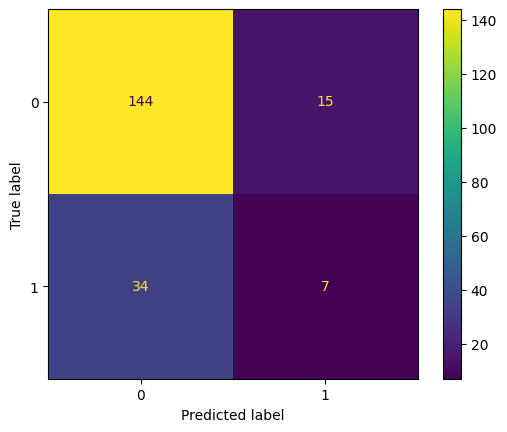

In [187]:
# Crie a matriz de confusão
confMatrixKNN = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn))
confMatrixKNN.plot()

# Modelo Random Forest

In [188]:
# criando modelo random forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [189]:
# fazendo a previsão dos conjuntos de teste
y_pred_RF = random_forest.predict(X_test)

In [190]:
# relatório de desempenho do modelo Random Forest
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       159
           1       0.73      0.39      0.51        41

    accuracy                           0.84       200
   macro avg       0.79      0.68      0.71       200
weighted avg       0.83      0.84      0.83       200



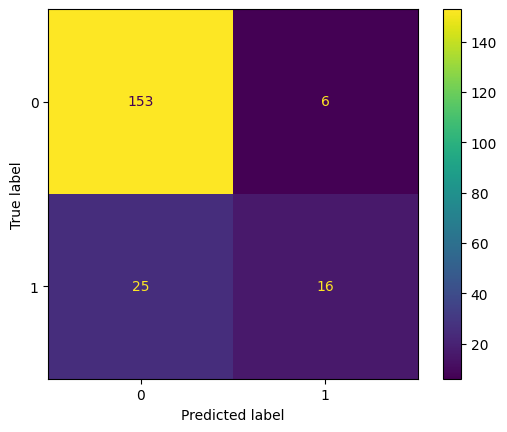

In [191]:
# Crie a matriz de confusão
confMatrixRF = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_RF))
confMatrixRF.plot()

# Modelo SVM

In [192]:
# criando modelo SVM
svm=SVC()
svm.fit(X_train, y_train)

SVC()

In [193]:
# fazendo a previsão dos conjuntos de teste
y_pred_svm = svm.predict(X_test)

In [194]:
# relatório de desempenho do modelo SVM
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

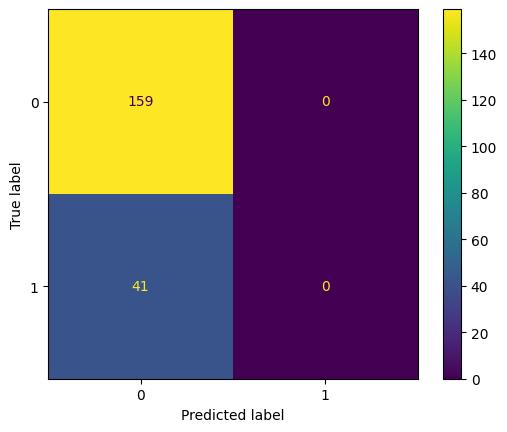

In [195]:
# Crie a matriz de confusão
confMatrixSVM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svm))
confMatrixSVM.plot()

# Modelo Árvore de Decisão

In [196]:
# criando modelo de árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [197]:
# fazendo a previsão dos conjuntos de teste
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [198]:
# relatório de desempenho do modelo de árvore de decisão
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       159
           1       0.48      0.51      0.49        41

    accuracy                           0.79       200
   macro avg       0.67      0.68      0.68       200
weighted avg       0.79      0.79      0.79       200



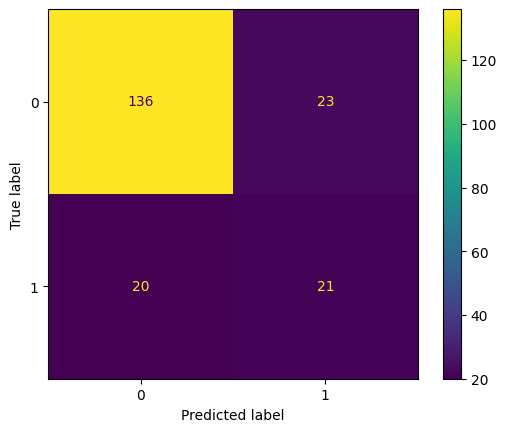

In [199]:
# Crie a matriz de confusão
confMatrixDecisionTree = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_tree))
confMatrixDecisionTree.plot()

# Modelo RNA

In [200]:
# Crie a arquitetura da RNA
model = Sequential()

# Adicione a primeira camada densamente conectada
# Ela tem 9 neurônios (ou unidades) e usa a função de ativação 'relu'
# input_shape número de características do conjunto de treinamento
model.add(Dense(9, activation='relu', input_shape=(X_train.shape[1],)))

# Adicione a segunda camada densamente conectada
# Esta é a primeira camada oculta
# Ela tem 100 neurônios e usa a função de ativação 'relu'
model.add(Dense(100, activation='relu'))

# Adicione a terceira camada densamente conectada
# Esta é a camada de saída
# sigmoid para classificação binária
model.add(Dense(1, activation='sigmoid'))

In [201]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [202]:
# treina o modelo
# atualiza o modelo após processar 32 lotes batch_size
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


25/25 [==============================] - 0s 571us/step - loss: 5.7908 - accuracy: 0.5494
Epoch 2/100
25/25 [==============================] - 0s 499us/step - loss: 1.3277 - accuracy: 0.7447
Epoch 3/100
25/25 [==============================] - 0s 474us/step - loss: 0.6945 - accuracy: 0.7447
Epoch 4/100
25/25 [==============================] - 0s 458us/step - loss: 0.5882 - accuracy: 0.7710
Epoch 5/100
25/25 [==============================] - 0s 435us/step - loss: 0.5850 - accuracy: 0.7610
Epoch 6/100
25/25 [==============================] - 0s 429us/step - loss: 0.5511 - accuracy: 0.7610
Epoch 7/100
25/25 [==============================] - 0s 428us/step - loss: 0.5421 - accuracy: 0.7722
Epoch 8/100
25/25 [==============================] - 0s 433us/step - loss: 0.5182 - accuracy: 0.7710
Epoch 9/100
25/25 [==============================] - 0s 431us/step - loss: 0.5370 - accuracy: 0.7822
Epoch 10/100
25/25 [==============================] - 0s 437us/step - loss: 0.5244 - accuracy: 0.7647
E

In [203]:
# Fazendo a previsão do conjunto de teste
y_pred_RNA = model.predict(X_test)
y_pred_RNA = le.inverse_transform(y_pred_RNA.argmax(axis=1))

7/7 [==============================] - 0s 454us/step


In [204]:
# relatório de desempenho do modelo RNA
print(classification_report(y_test, y_pred_RNA))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

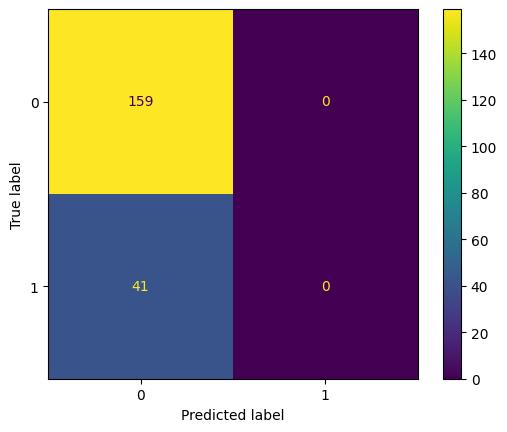

In [205]:
# Crie a matriz de confusão
confMatrixRNA = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_RNA))
confMatrixRNA.plot()